<a href="https://colab.research.google.com/github/DSabarish/netflix_data_analysis/blob/main/Netflix_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [82]:
#importing	libraries	for	our	purpose
import pandas	as	pd
import numpy	as	np
import matplotlib.pyplot	as	plt
import seaborn	as	sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df.info()


# Observations
# len = 8807 entries
# type convertion requried for --> [date_added to dt, release_year to dt, ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **Basis Cleaning**

In [83]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Remove leading and trailing spaces, extract only the date part, and convert to datetime format
df["date_added"] = (df["date_added"]
                    .str.strip()
                    .apply(pd.to_datetime)
                    .dt.date
                    .apply(pd.to_datetime)
                    )
# df["date_added"].head(3)

df["date_added"].describe()

count                             8797
mean     2019-05-17 05:59:08.436967168
min                2008-01-01 00:00:00
25%                2018-04-06 00:00:00
50%                2019-07-02 00:00:00
75%                2020-08-19 00:00:00
max                2021-09-25 00:00:00
Name: date_added, dtype: object

In [84]:
# Convert "release_year" column to datetime format with the middle of the year
df["release_year"] = pd.to_datetime(df["release_year"].astype(str) + '-07-01')
# df["release_year"].head(3)

df["release_year"].describe()


count                             8807
mean     2014-09-04 23:07:11.247870976
min                1925-07-01 00:00:00
25%                2013-07-01 00:00:00
50%                2017-07-01 00:00:00
75%                2019-07-01 00:00:00
max                2021-07-01 00:00:00
Name: release_year, dtype: object

In [85]:
df[df["release_year"] == df["release_year"].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925-07-01,TV-14,1 Season,TV Shows,This collection restores films from women who ...


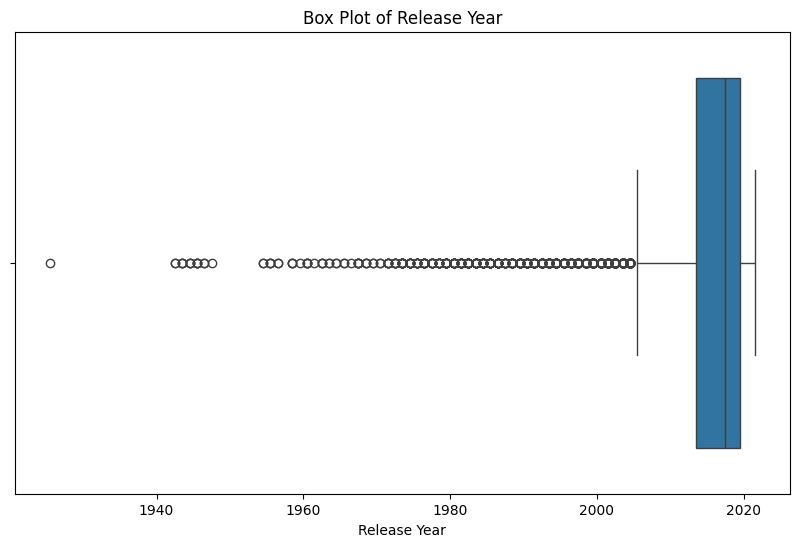

In [86]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['release_year'])

# Add title and labels
plt.title('Box Plot of Release Year')
plt.xlabel('Release Year')

# Show the plot
plt.show()


# **1 Director**

In [87]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df[["show_id","title","director"]].sample(10)

# # Checks
# df[["show_id","title","director"]].loc[df['title'] == "Scooby-Doo on Zombie Island"]

,show_id,title,director
3380,s3381,The Awakening of Motti Wolkenbruch,Michael Steiner
5783,s5784,Audrie & Daisy,"Bonni Cohen, Jon Shenk"
7997,s7998,Shark Busters,Herman Yau
51,s52,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara
2747,s2748,Ungli,Renzil D'Silva
518,s519,Har Kisse Ke Hisse: Kaamyaab,Hardik Mehta
4019,s4020,Everything About Her,Joyce Bernal
7791,s7792,Premachi Goshta,Satish Rajwade
971,s972,Between Worlds,Maria Pulera
5567,s5568,Outback Truckers,NaN


In [88]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Replace 'nan' with pd.NA
# Split strings by comma and convert to list, handling missing values
df['director'] = (df['director']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

# Explode the DataFrame to separate each director into its own row
unnested_dir_df = (df[["show_id","title","director"]]
                   .explode('director')
                   .reset_index(drop=True)
                   )

# unnested_df now contains each director in a separate row along with the corresponding title
unnested_dir_df.head(15)

### Checks : ok!
unnested_dir_df.loc[unnested_dir_df['title'] == "Scooby-Doo on Zombie Island"]
# type(unnested_dir_df.iloc[8721]["director"])

,show_id,title,director
8657,s7960,Scooby-Doo on Zombie Island,Hiroshi Aoyama
8658,s7960,Scooby-Doo on Zombie Island,Kazumi Fukushima
8659,s7960,Scooby-Doo on Zombie Island,Jim Stenstrum


# **2 Cast**

In [89]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

### Checks : ok!
df[['show_id','title','cast']].loc[df['title'] == "Blood & Water"]

,show_id,title,cast
1,s2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."


In [90]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Replace 'nan' with pd.NA
# Split strings by comma and convert to list, handling missing values
df['cast'] = (df['cast']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

# Explode the DataFrame to separate each cast member into its own row
unnested_cast_df = (df[['show_id','title','cast']]
                    .explode('cast')
                    .reset_index(drop=True)
                    )

# unnested_df now contains each director in a separate row along with the corresponding title
unnested_cast_df.head(15)

### Checks : ok!
# unnested_cast_df.loc[unnested_cast_df['title'] == "Blood & Water"]
# type(unnested_cast_df.iloc[8721]["director"])

,show_id,title,cast
0,s1,Dick Johnson Is Dead,<NA>
1,s2,Blood & Water,Ama Qamata
2,s2,Blood & Water,Khosi Ngema
3,s2,Blood & Water,Gail Mabalane
4,s2,Blood & Water,Thabang Molaba
5,s2,Blood & Water,Dillon Windvogel
6,s2,Blood & Water,Natasha Thahane
7,s2,Blood & Water,Arno Greeff
8,s2,Blood & Water,Xolile Tshabalala
9,s2,Blood & Water,Getmore Sithole


# **3 Listed in**

In [91]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

### Checks :
df[['show_id','title','listed_in']].loc[df['title'] == "Blood & Water"]

,show_id,title,listed_in
1,s2,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"


In [92]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Replace 'nan' with pd.NA
# Split strings by comma and convert to list, handling missing values
df['listed_in'] = (df['listed_in']
                    .replace('nan', pd.NA)
                    .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                    )

# Explode the DataFrame to separate each listed-in type into its own row
unnested_listed_in_df = (df[['show_id','title','listed_in']]
                          .explode('listed_in')
                          .reset_index(drop=True)
                          )

# unnested_df now contains each listed-in type in a separate row along with the corresponding title
unnested_listed_in_df.head(15)

### Checks : ok!
# unnested_cast_df.loc[unnested_listed_in_df['title'] == "Blood & Water"]
# type(unnested_listed_in_df.iloc[8721]["director"])

,show_id,title,listed_in
0,s1,Dick Johnson Is Dead,Documentaries
1,s2,Blood & Water,International TV Shows
2,s2,Blood & Water,TV Dramas
3,s2,Blood & Water,TV Mysteries
4,s3,Ganglands,Crime TV Shows
5,s3,Ganglands,International TV Shows
6,s3,Ganglands,TV Action & Adventure
7,s4,Jailbirds New Orleans,Docuseries
8,s4,Jailbirds New Orleans,Reality TV
9,s5,Kota Factory,International TV Shows


# **4 Country**

In [93]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

### Checks :
df[['show_id','title','country']].loc[df['title'] == "You Carry Me"]

,show_id,title,country
8788,s8789,You Carry Me,"Croatia, Slovenia, Serbia, Montenegro"


In [94]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Replace 'nan' with pd.NA
# Split strings by comma and convert to list, handling missing values
df['country'] = (df['country']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

# Explode the DataFrame to separate each country into its own row
unnested_country_df = (df[['show_id','title','country']]
                        .explode('country')
                        .reset_index(drop=True)
                        )

# unnested_df now contains each listed-in type in a separate row along with the corresponding title
unnested_country_df.head(15)

### Checks : ok!
unnested_country_df.loc[unnested_country_df['title'] == "You Carry Me"]

,show_id,title,country
10817,s8789,You Carry Me,Croatia
10818,s8789,You Carry Me,Slovenia
10819,s8789,You Carry Me,Serbia
10820,s8789,You Carry Me,Montenegro


# **Merging the Unnested DataFrame**

In [113]:
# unnested_dir_df
# unnested_cast_df
# unnested_listed_in_df
# unnested_country_df
#-------------------------------------------------------------------------------------


# Merge DataFrames using both 'title' and 'show_id'
merged_df = (unnested_dir_df
             .merge(unnested_cast_df, how='inner', on=['show_id', 'title'])
             .merge(unnested_listed_in_df, how='inner', on=['show_id', 'title'])
             .merge(unnested_country_df, how='inner', on=['show_id', 'title'])
             )

merged_df[:100]

data_quality_statistics(merged_df)

#-------------------------------------------------------------------------------------
#replacing	nan	values	of	director	and	actor	by	Unknown	Actor	and	Director
# df_new['Actors'].replace(['nan'],['Unknown	Actor'],inplace=True)
# df_new['Directors'].replace(['nan'],['Unknown	Director'],inplace=True)
# df_new['country'].replace(['nan'],[np.nan],inplace=True)
# df_new.head()


,Column,Number of Rows,Number of Unique Values,Number of NaN,Percentage of NaN,Data Type
0,show_id,201991,8807,0,0.00,object
1,title,201991,8807,0,0.00,object
2,director,201991,4993,50643,25.07,object
3,cast,201991,36439,2146,1.06,object
4,listed_in,201991,42,0,0.00,object
5,country,201991,127,11897,5.89,object


# **ABC**

In [112]:
import pandas as pd

def data_quality_statistics(df):
    """
    This function takes a DataFrame as input and returns a DataFrame containing data quality statistics
    for each column in the DataFrame.

    Args:
      df: A Pandas DataFrame.

    Returns:
      A DataFrame containing data quality statistics for each column.
    """

    # Number of rows in the DataFrame
    num_rows = len(df)

    # List to store statistics for each column
    stats = []

    # Iterate over columns
    for col in df.columns:
        # Number of unique values
        num_unique = df[col].nunique()

        # Number of NaN values
        num_nan = df[col].isnull().sum()

        # Percentage of NaN values
        pct_nan = (num_nan / num_rows) * 100

        # Data type of the column
        data_type = df[col].dtype

        # Append statistics to the list
        stats.append({
            'Column': col,
            'Number of Rows': num_rows,
            'Number of Unique Values': num_unique,
            'Number of NaN': num_nan,
            'Percentage of NaN': round(pct_nan, 2),
            'Data Type': data_type,
            # Add more statistics here if needed
        })

    # Convert list of dictionaries to DataFrame
    stats_df = pd.DataFrame(stats)

    return stats_df

# Example usage:
# data_quality_statistics(df)


In [ ]:
data_quality_statistics(df)

In [ ]:
missing_values = df.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

In [ ]:
tidy.shape

In [ ]:
miss.shape

In [ ]:
missing_values = df.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

print(tidy.shape[0]) # No NaN in any Rows
print(miss.shape[0]) # At least 1 NaN in all Rows

In [ ]:
data_quality_statistics(miss)

In [ ]:
# from the above "data_quality_statistics" we can obsere there are 225 unique coutries, which is leading to suspison.

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df["country"].unique()[:100] #..Code(1)
# df["country"].value_counts() #..Code(2)

# we can see issues like
      # nan
      # 'United States' , 'United States, and United States'
      # Extra whitespace
      #  Some entries have multiple countries listed together separated by commas, example "Mexico, United States, Spain, Colombia" , "France, Senegal, Belgium" etc



In [ ]:
import pandas as pd

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df["country"] = df["country"].fillna("").astype(str)
a=sorted(df["country"].unique())[:100]
print(len(df['country'].unique()))
# Split entries with multiple countries into separate rows
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Clean up country names
# The 'explode' function splits entries with multiple countries into separate rows.
# For example, if a row originally had 'United States, Canada', it would become two rows,
# one with 'United States' and another with 'Canada'.
# The 'split' function splits the string on commas, creating a list of countries.
# Then, 'explode' converts each item in the list into a separate row.
# This is necessary because each row should represent only one country.

# The following lines would strip leading and trailing whitespaces from country names.
# However, it seems that the data already has clean country names, so this step is unnecessary.
# df['country'] = df['country'].str.strip()

# Now, let's get the unique country names
# print(len(df['country'].unique()))

# df["country"] = df["country"].fillna("").astype(str)
# sorted(df["country"].unique())[:100]
# df["country"].value_counts() #..Code(2)\
# df["country"].isna()
a[:10]

In [ ]:
df.show_id.nunique()